# **CA04 - Ensemble Models**

# 1. Building a Random Forest Model

In [0]:
#Import all the necessary packages to run the models.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier
import re

In [0]:
#Read the csv file into a DataFrame. 
census_df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')
census_df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [0]:
#Divide the dataset into training and test set by the column "flag". 
train_set=census_df[census_df['flag']=='train']
test_set=census_df[census_df['flag']=='test']

In [0]:
#Get the dummies for the categorical variables. This will return a DataFrame with 0s and 1s.
X_train = pd.get_dummies(train_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_train=train_set['y']
X_test=pd.get_dummies(test_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_test=test_set['y']

AUC:  0.7461240259019287


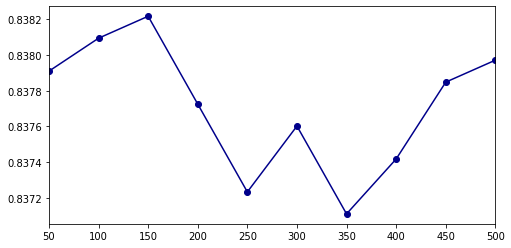

In [0]:
#Run Random Forest Classifier by fitting the training data into the Classifier. Incorporate different number of n_estimators and plot the results. 
results = []
n_estimators_options=[50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators_options:
  model=RandomForestClassifier(n_estimators=trees,random_state=101)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color='darkblue',marker='o')
print('AUC: ',roc_auc_score(y_test,y_pred))

# 2. Building AdaBoost, Gradient Boost (classifier) and XGB Model

## a. AdaBoost

AUC:  0.7460076328264228


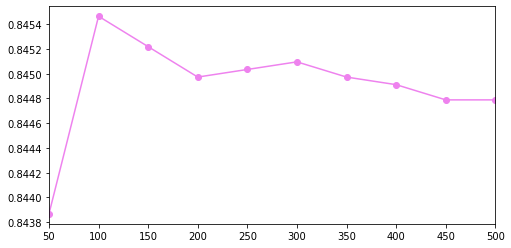

In [0]:
#Run AdaBoost Classifier by fitting the training data into the Classifier. Incorporate different number of n_estimators and plot the results.
results = []

for trees in n_estimators_options:
  model=AdaBoostClassifier(n_estimators=trees,random_state=101)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color='violet',marker='o')
print('AUC: ',roc_auc_score(y_test,y_pred))

## b. Gradient Boost

AUC:  0.7573367156640427


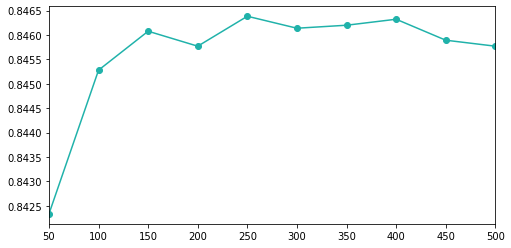

In [0]:
#Run Gradient Boosting Classifier by fitting the training data into the Classifier. Incorporate different number of n_estimators and plot the results.
results = []

for trees in n_estimators_options:
  model= GradientBoostingClassifier(n_estimators=trees,random_state=101)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color='lightseagreen',marker='o')
print('AUC: ',roc_auc_score(y_test,y_pred))

## c. XGBoost

https://stackoverflow.com/questions/48645846/pythons-xgoost-valueerrorfeature-names-may-not-contain-or

In [0]:
#Take out the symbols such as ">" or "&" from the column names of X_train and X_test. This is needed ro run the XGBoosting. 
regex = re.compile(r"\[|\]|<|>|&", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<','>','&'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<','>','&'))) else col for col in X_test.columns.values]

AUC:  0.7601351677710052


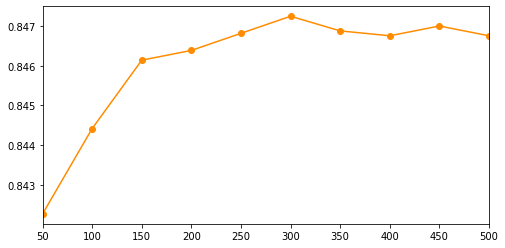

In [0]:
#Run XGBoost Classifier by fitting the training data into the Classifier. Incorporate different number of n_estimators and plot the results.
results = []

for trees in n_estimators_options:
  model= XGBClassifier(n_estimators=trees,random_state=101)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color='darkorange',marker='o')
print('AUC: ',roc_auc_score(y_test,y_pred))

# 3. Compare Performance

In [0]:
#Reset the results list. 
results=[]

In [0]:
#Run the 4 models with n_estimators=150. 

In [0]:
  model=RandomForestClassifier(n_estimators=150,random_state=101)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)
  auc0=roc_auc_score(y_test,y_pred)

In [0]:
  model=AdaBoostClassifier(n_estimators=150,random_state=101)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)
  auc1=roc_auc_score(y_test,y_pred)

In [0]:
  model= GradientBoostingClassifier(n_estimators=150,random_state=101)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)
  auc2=roc_auc_score(y_test,y_pred)

In [0]:
  model= XGBClassifier(n_estimators=150,random_state=101)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)
  auc3=roc_auc_score(y_test,y_pred)

In [0]:
#Print the performance table with accuracy and AUC values from each model. 
performance_table = pd.DataFrame({'Random_Forest':[results[0],auc0],'AdaBoost':[results[1],auc1],'Gradient_Boosting':[results[2],auc2],'XGBoosting':[results[3],auc3]},index=['Accuracy','AUC'])
print('-----------------------------------------------------------------')
print(performance_table)
print('-----------------------------------------------------------------')
print('n_estimators=150,random_state=101')


-----------------------------------------------------------------
          Random_Forest  AdaBoost  Gradient_Boosting  XGBoosting
Accuracy       0.838216  0.845218           0.846078    0.846140
AUC            0.747273  0.746738           0.754126    0.751472
-----------------------------------------------------------------
n_estimators=150,random_state=101
